In [425]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [426]:
pd.set_option('display.max_columns', None)

In [427]:
data = pd.read_excel("opros.xlsx")
data.head()

,Ваш пол,Возраст,Характер,Что вы предпочитаете?,Как часто вы берете инициативу в свои руки?,Как часто вы берете инициативу в свои руки? / Баллы,Как часто вы пропускаете завтраки?,Как часто вы пропускаете завтраки? / Баллы,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Какая культура ближе,Какая культура ближе / Баллы,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Выпиваете алкоголь / Баллы,Время подъема,Формат работы,Формат работы / Баллы,Любите сладкое?,Любимое время года?,Любимое время года? / Баллы,Что пьют родители,Что пьют родители / Баллы,Какие напитки любите,Какие напитки любите / Баллы,Азартен?,Набрано баллов,Всего баллов,Результат теста
0,Женский,22,Холерик,Кофе,Периодически,NaN,Очень часто,NaN,10,Нет,Да,Да,Да,Да,Да,Да,Восток,NaN,Нет,Нет,Редко,NaN,12,Не работаю,NaN,Да,Весна,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
1,Мужской,22,Холерик,Чай,Часто,NaN,Очень часто,NaN,6,Да,Нет,Нет,Нет,Нет,Нет,Нет,Запад,NaN,Нет,Нет,Нет,NaN,6,Удаленка,NaN,Нет,Весна,NaN,Чай,NaN,Холодные,NaN,Да,0,0,NaN
2,Мужской,22,Меланхолик,Кофе,Очень редко,NaN,Часто,NaN,6,Нет,Да,Да,Да,Да,Да,Нет,Запад,NaN,Нет,Нет,Да,NaN,7,Офис,NaN,Нет,Весна,NaN,Кофе,NaN,Холодные,NaN,Нет,0,0,NaN
3,Мужской,22,Флегматик,Чай,Часто,NaN,Очень редко,NaN,6,Нет,Да,Нет,Да,Да,Да,Нет,Не знаю,NaN,Нет,Нет,Нет,NaN,12,Офис,NaN,Да,Лето,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
4,Мужской,21,Флегматик,Чай,Часто,NaN,Редко,NaN,8,Нет,Нет,Нет,Нет,Нет,Нет,Нет,Запад,NaN,Нет,Да,Нет,NaN,8,Удаленка,NaN,Да,Осень,NaN,Чай и кофе,NaN,Горячие,NaN,Нет,0,0,NaN


In [428]:
data = data.dropna(axis=1, how='all')

In [429]:
data.drop(columns=['Набрано баллов', 'Всего баллов'], inplace=True)
data['Чай или кофе'] = data.apply(lambda x: 1 if x['Что вы предпочитаете?'] == 'Чай' else 0, axis = 1)

In [430]:
data['Родные чай'] = data.apply(lambda x: True if (x['Что пьют родители'] == 'Чай' or x['Что пьют родители'] == 'Чай и кофе') else False, axis = 1)
data['Родные кофе'] = data.apply(lambda x: True if (x['Что пьют родители'] == 'Кофе' or x['Что пьют родители'] == 'Чай и кофе') else False, axis = 1)
data.drop(columns=['Что пьют родители'], inplace=True)

In [431]:
data['Запад'] = data.apply(lambda x: True if x['Какая культура ближе'] == 'Запад' else False, axis = 1)
data['Восток'] = data.apply(lambda x: True if x['Какая культура ближе'] == 'Восток' else False, axis = 1)
data.drop(columns=['Какая культура ближе'], inplace=True)

In [432]:
data['Выпиваете алкоголь'] = data.apply(lambda x: (1 if x['Выпиваете алкоголь'] == 'Да' else 0.5) if x['Выпиваете алкоголь'] != 'Нет' else 0, axis = 1)

In [433]:
data = data.replace("Да", True)
data = data.replace("Нет", False)

C:\Users\user\AppData\Local\Temp\ipykernel_10908\2816921470.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace("Нет", False)


In [434]:
def grade(row, column):
  if row[column] == 'Очень редко':
    return 1
  elif row[column] == 'Редко':
    return 2
  elif row[column] == 'Периодически':
    return 3
  elif row[column] == 'Часто':
    return 4
  elif row[column] == 'Очень часто':
    return 5
data['Как часто вы берете инициативу в свои руки?'] = data.apply(grade, column='Как часто вы берете инициативу в свои руки?', axis=1)
data['Как часто вы пропускаете завтраки?'] = data.apply(grade, column='Как часто вы пропускаете завтраки?', axis=1)

In [435]:
data.head()

,Ваш пол,Возраст,Характер,Что вы предпочитаете?,Как часто вы берете инициативу в свои руки?,Как часто вы пропускаете завтраки?,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Формат работы,Любите сладкое?,Любимое время года?,Какие напитки любите,Азартен?,Чай или кофе,Родные чай,Родные кофе,Запад,Восток
0,Женский,22,Холерик,Кофе,3,5,10,False,True,True,True,True,True,True,False,False,0.5,12,Не работаю,True,Весна,Холодные,False,0,True,True,False,True
1,Мужской,22,Холерик,Чай,4,5,6,True,False,False,False,False,False,False,False,False,0.0,6,Удаленка,False,Весна,Холодные,True,1,True,False,True,False
2,Мужской,22,Меланхолик,Кофе,1,4,6,False,True,True,True,True,True,False,False,False,1.0,7,Офис,False,Весна,Холодные,False,0,False,True,True,False
3,Мужской,22,Флегматик,Чай,4,1,6,False,True,False,True,True,True,False,False,False,0.0,12,Офис,True,Лето,Холодные,False,1,True,True,False,False
4,Мужской,21,Флегматик,Чай,4,2,8,False,False,False,False,False,False,False,False,True,0.0,8,Удаленка,True,Осень,Горячие,False,1,True,True,True,False


In [436]:
#Проверка на дубли
data.duplicated().sum()

0

In [437]:
#Списки числовых и категориальных признаков
num_cols = []
cat_col = []



for column in data:
  if data[column].dtype == 'int64':
    num_cols.append(column)
  else:
    cat_col.append(column)

print(num_cols)

['Возраст', 'Как часто вы берете инициативу в свои руки?', 'Как часто вы пропускаете завтраки?', 'Сколько спите ночью в среднем', 'Время подъема', 'Чай или кофе']


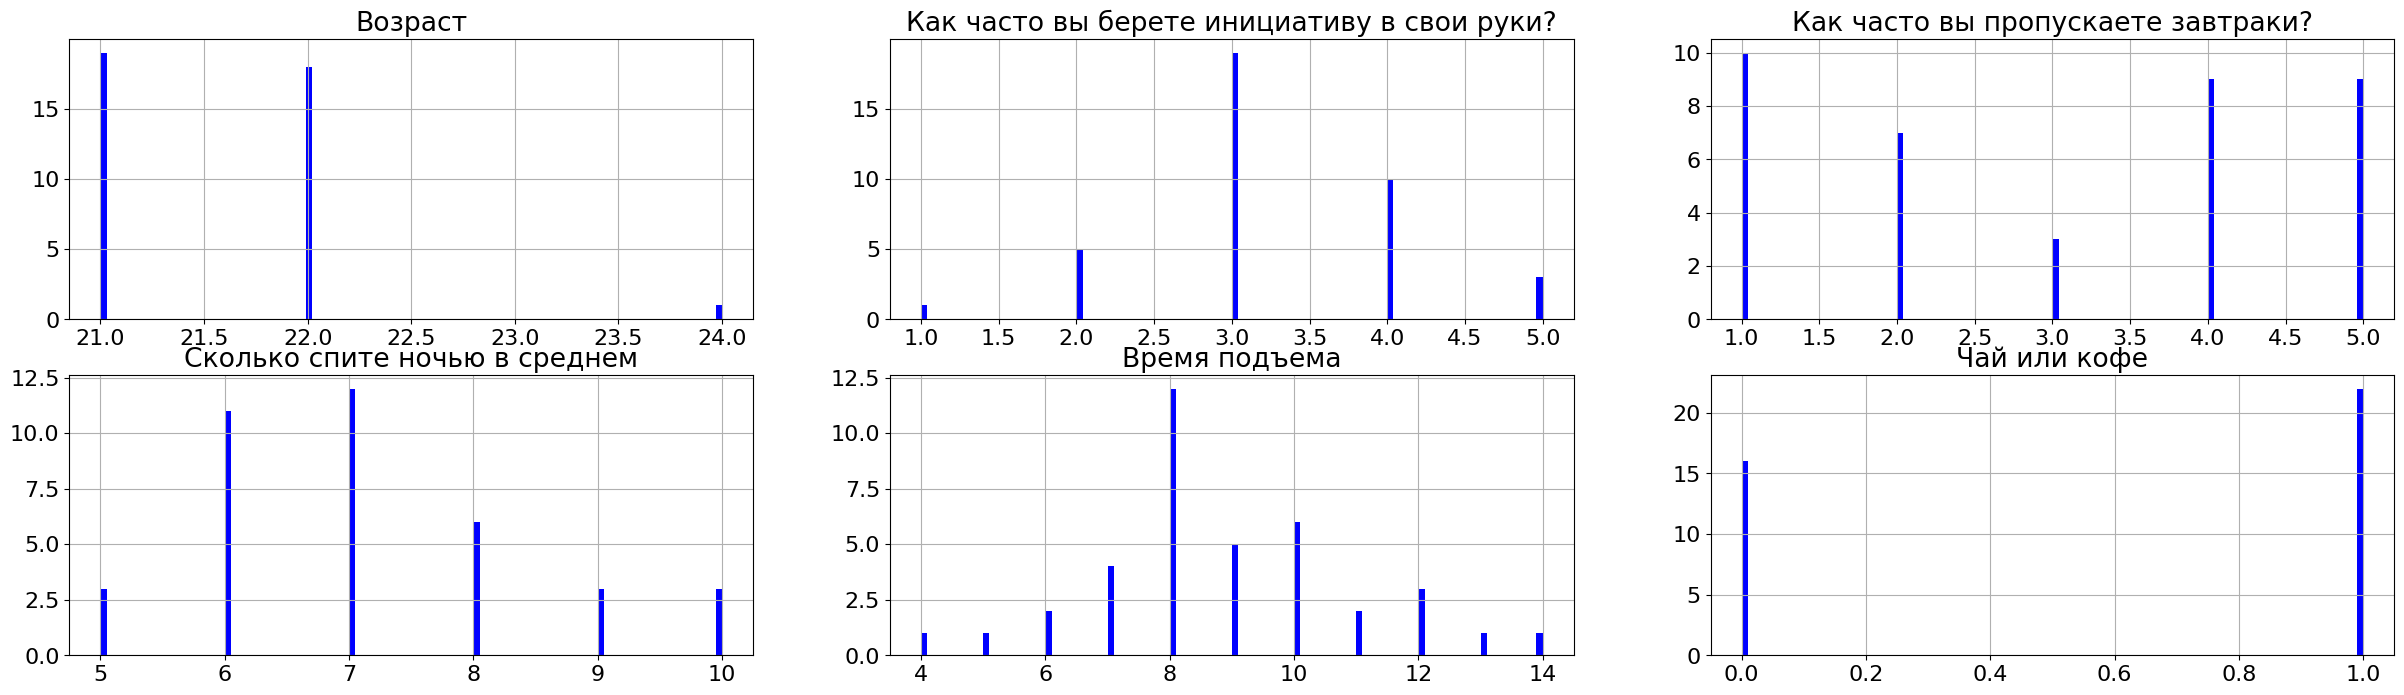

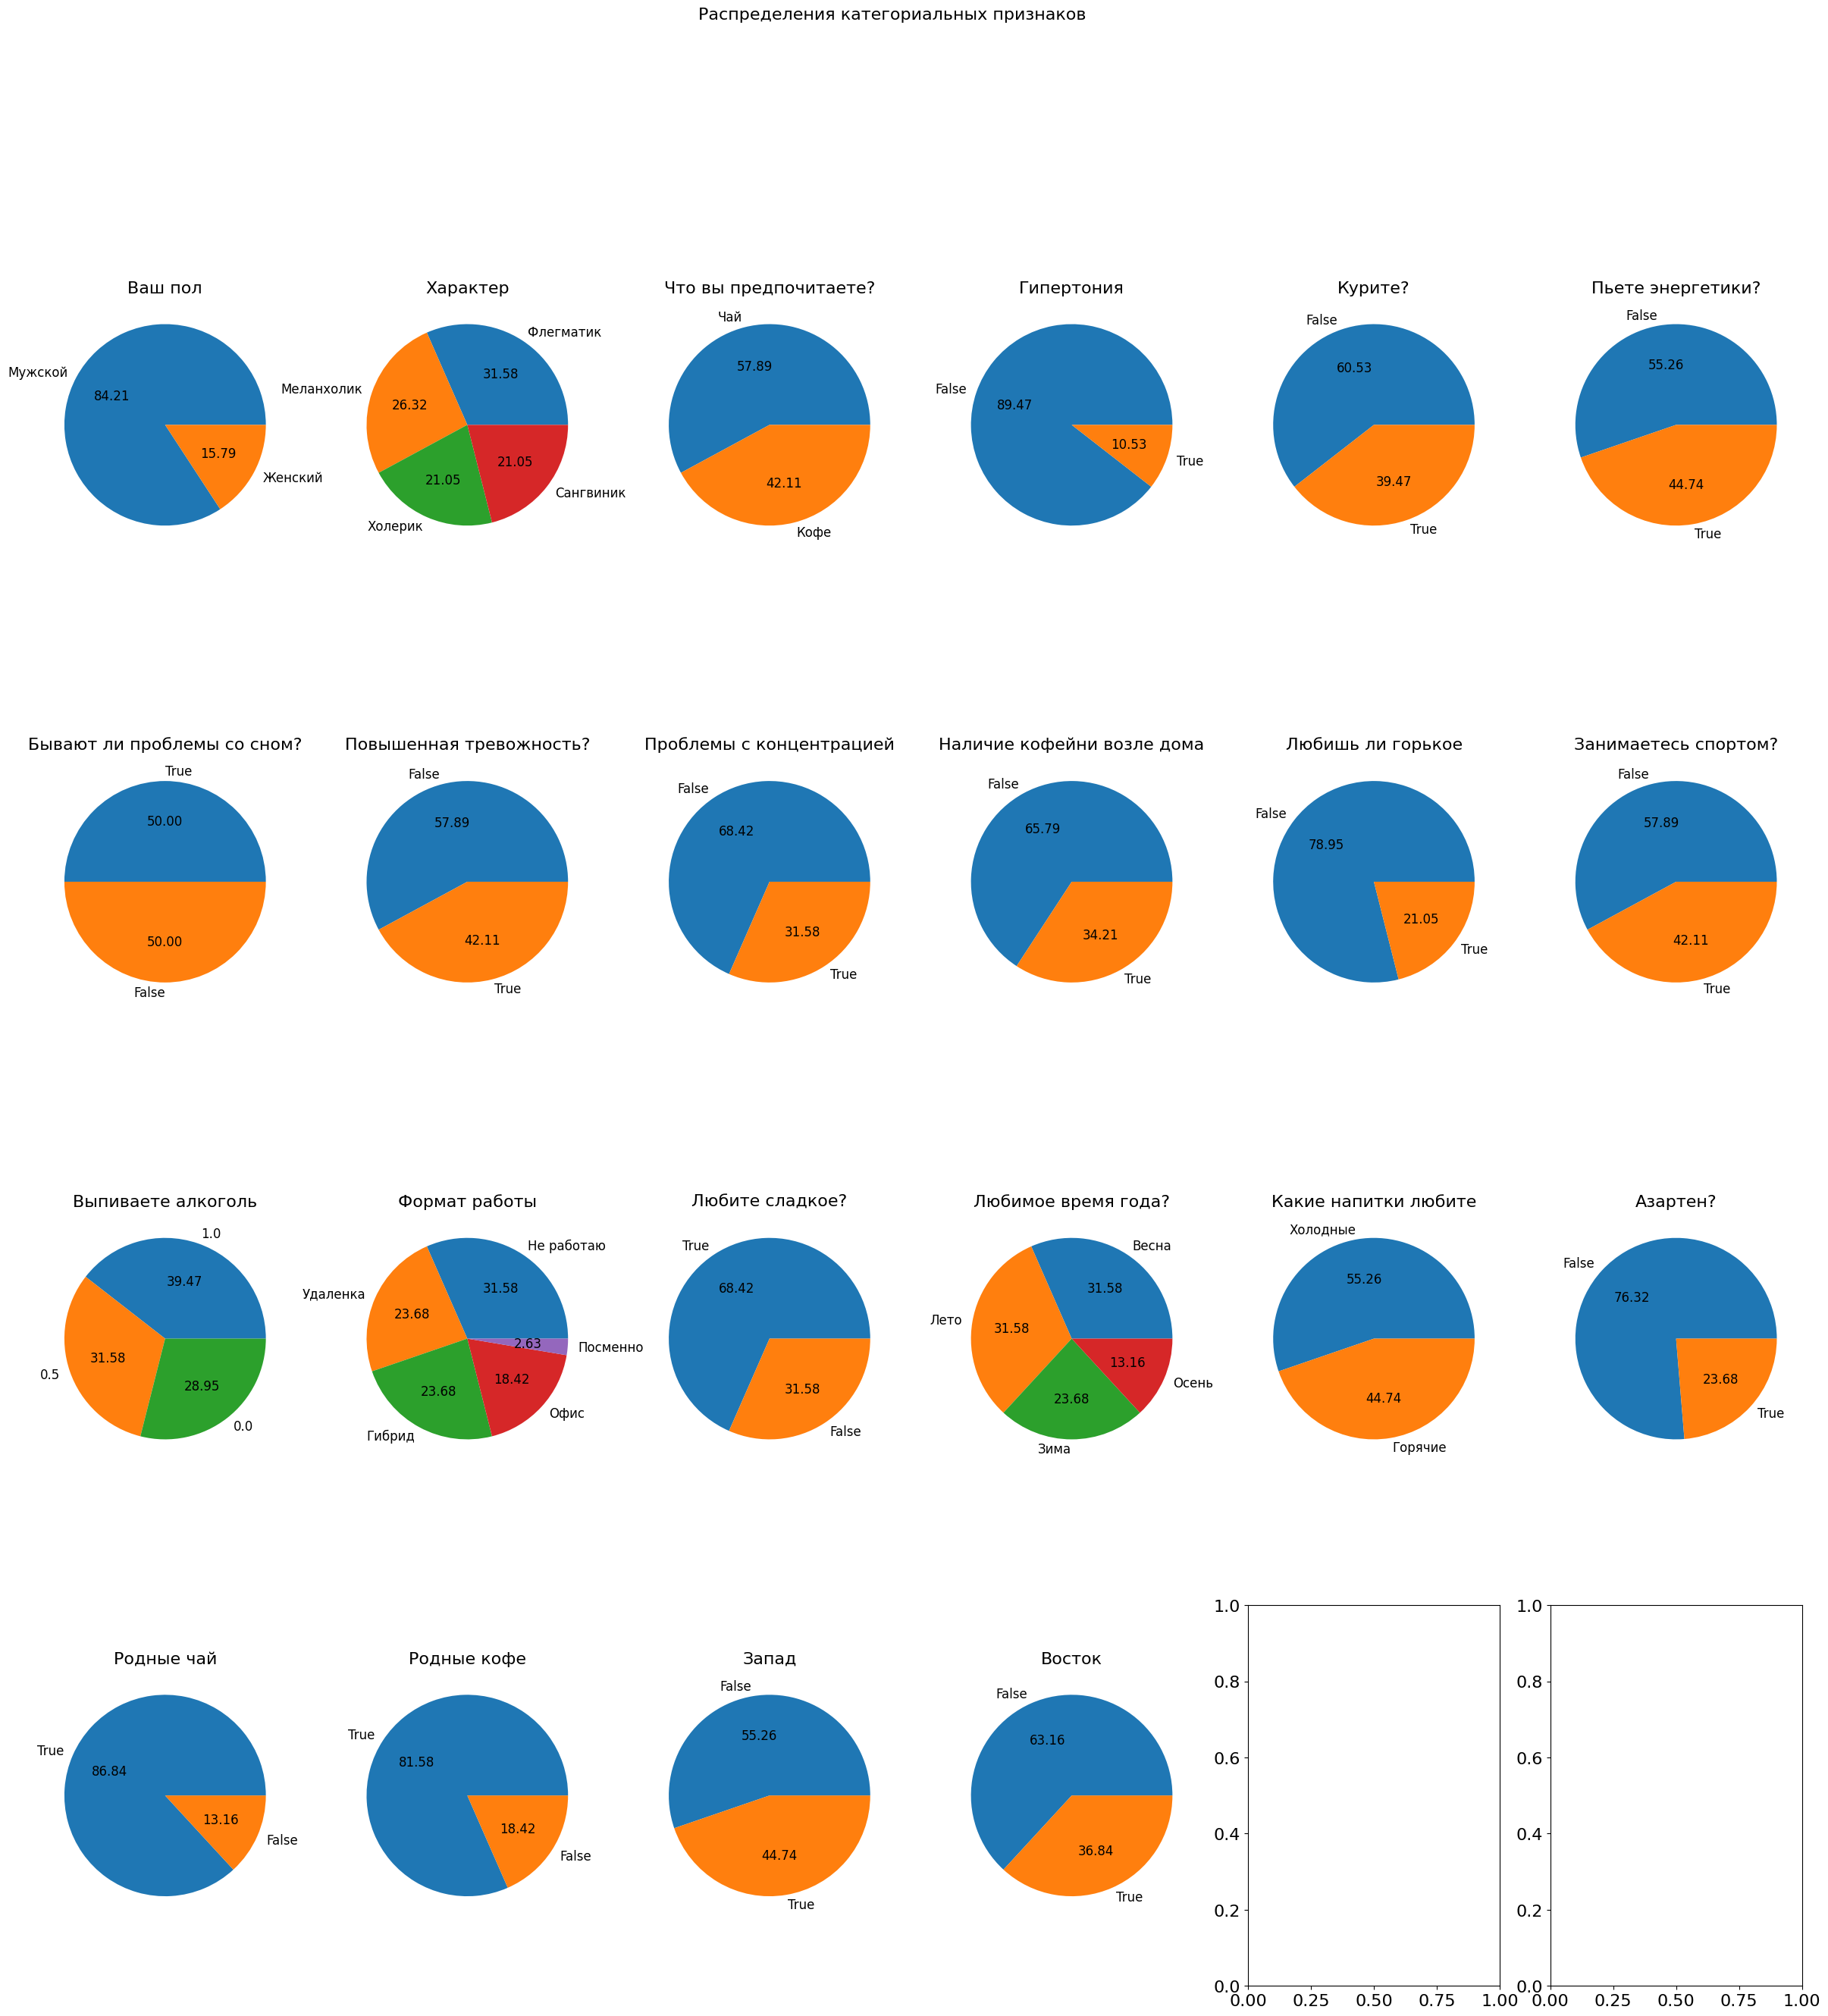

In [438]:
#Смотрим распределение признаков
numeric = data[num_cols]
categorial = data[cat_col]


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 3, figsize=(30, 8))
ax = ax.ravel()
for i, j in enumerate(numeric.keys()):
    out = ax[i].hist(numeric[j].values, 100, facecolor='b')
    ax[i].set_title(j)
    ax[i].grid(True)
fig, ax = plt.subplots(4, 6, figsize=(30, 30))
ax = ax.ravel()
fig.suptitle('Распределения категориальных признаков', fontsize=16)
for i, j in enumerate(categorial):
    out = ax[i].pie(categorial[j].value_counts(), labels = categorial[j].value_counts().keys(), autopct='%.2f', textprops={'fontsize': 12})
    ax[i].set_title(j, fontsize=16)
plt.show()

In [439]:
data = pd.get_dummies(data, drop_first = True)

In [440]:
data.head()

,Возраст,Как часто вы берете инициативу в свои руки?,Как часто вы пропускаете завтраки?,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Любите сладкое?,Азартен?,Чай или кофе,Родные чай,Родные кофе,Запад,Восток,Ваш пол_Мужской,Характер_Сангвиник,Характер_Флегматик,Характер_Холерик,Что вы предпочитаете?_Чай,Формат работы_Не работаю,Формат работы_Офис,Формат работы_Посменно,Формат работы_Удаленка,Любимое время года?_Зима,Любимое время года?_Лето,Любимое время года?_Осень,Какие напитки любите_Холодные
0,22,3,5,10,False,True,True,True,True,True,True,False,False,0.5,12,True,False,0,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True
1,22,4,5,6,True,False,False,False,False,False,False,False,False,0.0,6,False,True,1,True,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,True
2,22,1,4,6,False,True,True,True,True,True,False,False,False,1.0,7,False,False,0,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
3,22,4,1,6,False,True,False,True,True,True,False,False,False,0.0,12,True,False,1,True,True,False,False,True,False,True,False,True,False,True,False,False,False,True,False,True
4,21,4,2,8,False,False,False,False,False,False,False,False,True,0.0,8,True,False,1,True,True,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False


In [441]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [442]:
train, valid = train_test_split(data, test_size = 0.2, random_state = 42)
x_train = train.drop('Чай или кофе', axis = 1)
x_valid = valid.drop('Чай или кофе', axis = 1)

y_train = train['Чай или кофе']
y_valid = valid['Чай или кофе']

In [443]:
gs_kmeans = GridSearchCV(KMeans(random_state=42, max_iter=3000),
                         param_grid = {
                             'n_clusters': [2, 4, 6, 8],
                             'init': ['k-means++', 'random'],
                         },
                         scoring='f1_micro', cv=5, n_jobs=-1)

In [444]:
gs_kmeans.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KMeans(max_iter=3000, random_state=42), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': [2, 4, 6, 8]},
             scoring='f1_micro')

In [445]:
gs_kmeans.best_params_

{'init': 'k-means++', 'n_clusters': 2}

In [446]:
best_model = gs_kmeans.best_estimator_

In [447]:
print("Homogeneity: {0:0.3f}".format(
    metrics.homogeneity_score(y_train, best_model.labels_)))
print("Completeness: {0:0.3f}".format(
    metrics.completeness_score(y_train, best_model.labels_)))
print("V_measure: {0:0.3f}".format(
    metrics.v_measure_score(y_train, best_model.labels_)))
print("Adjusted random: {0:0.3f}".format(
    metrics.adjusted_rand_score(y_train, best_model.labels_)))
print("Rand Index: {0:0.3f}".format(
    metrics.rand_score(y_train, best_model.labels_)))
print("Silhouette: {0:0.3f}".format(
    metrics.silhouette_score(x_train, best_model.labels_, metric='euclidean', sample_size=300)))
print("Accuracy: {0:0.3f}".format(
    metrics.accuracy_score(y_train, best_model.labels_)))
print("Precision: {0:0.3f}".format(
    metrics.precision_score(y_train, best_model.labels_)))
print("Recall: {0:0.3f}".format(
    metrics.recall_score(y_train, best_model.labels_)))
print("F1 info: {0:0.3f}".format(
    metrics.f1_score(y_train, best_model.labels_)))
print("Roc auc: {0:0.3f}".format(
    metrics.roc_auc_score(y_train, best_model.labels_)))

Homogeneity: 0.153
Однородность: 0.151
V_measure: 0.152
Adjusted random: 0.131
Rand Index: 0.566
Silhouette: 0.123
Accuracy: 0.700
Precision: 0.846
Recall: 0.611
F1 info: 0.710
Roc auc: 0.722


In [448]:
predict = best_model.predict()

In [454]:
predict

array([0, 1, 1, 0, 1, 1, 0, 1])

In [455]:
x_valid

,Возраст,Как часто вы берете инициативу в свои руки?,Как часто вы пропускаете завтраки?,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Любите сладкое?,Азартен?,Родные чай,Родные кофе,Запад,Восток,Ваш пол_Мужской,Характер_Сангвиник,Характер_Флегматик,Характер_Холерик,Что вы предпочитаете?_Чай,Формат работы_Не работаю,Формат работы_Офис,Формат работы_Посменно,Формат работы_Удаленка,Любимое время года?_Зима,Любимое время года?_Лето,Любимое время года?_Осень,Какие напитки любите_Холодные
33,21,4,5,5,False,True,True,True,True,False,True,False,True,1.0,8,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False
36,21,3,1,10,False,False,False,False,False,False,False,False,True,0.0,11,True,False,True,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False
4,21,4,2,8,False,False,False,False,False,False,False,False,True,0.0,8,True,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False
13,21,2,5,9,False,False,True,False,True,False,False,False,False,0.0,8,True,False,True,True,True,False,True,True,False,False,False,False,True,False,False,True,False,False,True
30,22,5,1,6,False,False,False,False,False,False,False,False,False,1.0,8,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,True,False,False
26,21,3,1,7,False,False,False,False,False,False,False,False,False,0.0,10,True,False,True,True,False,True,True,False,True,False,True,True,False,False,False,False,True,False,True
6,21,2,4,9,False,False,False,True,False,True,False,False,False,0.0,12,True,False,True,True,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False
27,21,2,2,9,False,False,False,False,False,False,False,False,False,0.0,10,False,True,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True


In [449]:
print("Test Homogeneity: {0:0.3f}".format(
    metrics.homogeneity_score(y_valid, predict)))
print("Test Completeness: {0:0.3f}".format(
    metrics.completeness_score(y_valid, predict)))
print("Test V_measure: {0:0.3f}".format(
    metrics.v_measure_score(y_valid, predict)))
print("Test Adjusted random: {0:0.3f}".format(
    metrics.adjusted_rand_score(y_valid, predict)))
print("Test Rand Index info: {0:0.3f}".format(
    metrics.rand_score(y_valid, predict)))
print("Test Silhouette: {0:0.3f}".format(
    metrics.silhouette_score(x_valid, predict, metric='euclidean', sample_size=300)))
print("Test Accuracy info: {0:0.3f}".format(
    metrics.accuracy_score(y_valid, predict)))
print("Test Precision info: {0:0.3f}".format(
    metrics.precision_score(y_valid, predict)))
print("Test Recall info: {0:0.3f}".format(
    metrics.recall_score(y_valid, predict)))
print("Test F1 info: {0:0.3f}".format(
    metrics.f1_score(y_valid, predict)))
print("Test Roc auc info: {0:0.3f}".format(
    metrics.roc_auc_score(y_valid, predict)))

Test Homogeneity: 0.049
Test Completeness: 0.051
Test V_measure: 0.050
Test Adjusted random: -0.082
Test Rand Index info: 0.464
Test Silhouette: 0.141
Test Accuracy info: 0.625
Test Precision info: 0.600
Test Recall info: 0.750
Test F1 info: 0.667
Test Roc auc info: 0.625


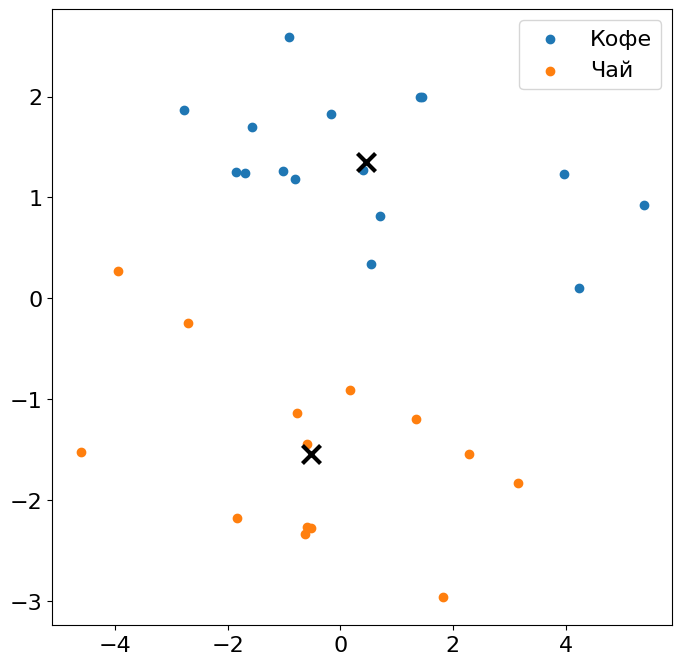

In [450]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(2)
reduced_data = pca.fit_transform(x_train)
best_model.fit(reduced_data)

# Calculating the centroids
centroids = best_model.cluster_centers_
label = best_model.fit_predict(reduced_data)
unique_labels = np.unique(label)

# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.legend(['Кофе', 'Чай'])
plt.show()